<a href="https://colab.research.google.com/github/leeEunJooo/NetworkAssociation/blob/master/packetperhour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Colab은 처음 시작 전 드라이브와 연결 해야함

In [3]:
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/졸업과제/modify.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,7,10,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 데이터 불러오기

In [4]:
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
data


,Unnamed: 0,l1,AP,AP.1,AP.2,AP.3,Client,Client.1,Client.2,Client.3,Client.4,Client.5,Client.6,Client.7,Client.8,Client.9,Client.10,Client.11,Client.12,Utilization,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Association Time,Association Time.1,Association Time.2,Association Time.3,Association Time.4,Association Time.5,Disassociation Time,Disassociation Time.1,Disassociation Time.2,Disassociation Time.3,Disassociation Time.4,Disassociation Time.5,Session Duration,Session Duration.1,Session Duration.2,Session Duration.3
0,0,l2,Name,MAC Address,IP Address,Map Location,IP Address,MAC Address,Radio Type,SSID,VLAN ID,Protocol,Policy Type,Type,Endpoint Type,Association ID,Authentication,Encryption Cipher,EAP Type,Avg. Session Throughput (Kbps),Bytes Sent,Bytes Received,Packets Sent,Packets Received,SNR (dB),RSSI (dBm),Data Retries,RTS Retries,year,month,day,hour,minute,second,year,month,day,hour,minute,second,days,hours,minutes,seconds
1,1,0,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.30,0,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,2.9,43908,67148,294,215,26,-52,601,0,2020,4,18,11,32,15,2020,4,18,11,37,16,0,0,5,1
2,2,1,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.24.103,1,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,"iPad11,3",1,Yes,CCMP (AES),TTLS,<0.1,0,0,0,0,2,-76,60,0,2020,4,13,16,8,19,2020,4,13,16,13,20,0,0,5,1
3,3,2,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.200,2,802.11b/g/n,eduroam,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,17,Yes,CCMP (AES),PEAP,46.1,877159,4333234,3410,4128,13,-69,9352,0,2020,2,10,14,46,48,2020,2,10,15,1,52,0,0,15,4
4,4,3,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,10.29.101.41,2,802.11a/n/ac,eduroam,17,802.11ac,WPA2,Unified Wireless,Linux-Workstation,94,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,22,-69,3,0,2020,2,11,19,32,13,2020,2,11,19,42,15,0,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186578,3186578,3186577,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,27,7,51,9,2019,6,27,8,1,11,0,0,10,2
3186579,3186579,3186578,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.248.255,28328,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,14.1,2336601,6946166,6205,7813,6,-83,2200,0,2019,6,12,10,12,1,2019,6,12,11,49,52,0,1,37,51
3186580,3186580,3186579,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.251.110,3830,802.11a/n/ac,PNU-WiFi,19,802.11ac,WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1715,0,2019,6,13,10,14,20,2019,6,13,10,19,30,0,0,5,10
3186581,3186581,3186580,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,13,10,14,21,2019,6,13,10,19,30,0,0,5,9


# 필요한 모듈과 데이터 보기

In [0]:
data['Disassociation Time.6'] = data[['Disassociation Time','Disassociation Time.1','Disassociation Time.2','Disassociation Time.3','Disassociation Time.4','Disassociation Time.5']].apply(lambda x : '-'.join(str(v) for v in x), axis = 1)
data['Association Time.6'] = data[['Association Time','Association Time.1','Association Time.2','Association Time.3','Association Time.4','Association Time.5']].apply(lambda x : '-'.join(str(v) for v in x), axis = 1)

# Time 나누어져 있는거 합치기

In [6]:

data['Association Time.6'][1:] = data['Association Time.6'][1:].apply(lambda x : datetime.datetime.strptime(x,  '%Y-%m-%d-%H-%M-%S'))
data['Disassociation Time.6'][1:] = data['Disassociation Time.6'][1:].apply(lambda x : datetime.datetime.strptime(x,  '%Y-%m-%d-%H-%M-%S'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Time 합친걸 datetime 형식으로 바꾸기

In [7]:
data

,Unnamed: 0,l1,AP,AP.1,AP.2,AP.3,Client,Client.1,Client.2,Client.3,Client.4,Client.5,Client.6,Client.7,Client.8,Client.9,Client.10,Client.11,Client.12,Utilization,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Association Time,Association Time.1,Association Time.2,Association Time.3,Association Time.4,Association Time.5,Disassociation Time,Disassociation Time.1,Disassociation Time.2,Disassociation Time.3,Disassociation Time.4,Disassociation Time.5,Session Duration,Session Duration.1,Session Duration.2,Session Duration.3,Disassociation Time.6,Association Time.6
0,0,l2,Name,MAC Address,IP Address,Map Location,IP Address,MAC Address,Radio Type,SSID,VLAN ID,Protocol,Policy Type,Type,Endpoint Type,Association ID,Authentication,Encryption Cipher,EAP Type,Avg. Session Throughput (Kbps),Bytes Sent,Bytes Received,Packets Sent,Packets Received,SNR (dB),RSSI (dBm),Data Retries,RTS Retries,year,month,day,hour,minute,second,year,month,day,hour,minute,second,days,hours,minutes,seconds,year-month-day-hour-minute-second,year-month-day-hour-minute-second
1,1,0,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.30,0,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,2.9,43908,67148,294,215,26,-52,601,0,2020,4,18,11,32,15,2020,4,18,11,37,16,0,0,5,1,2020-04-18 11:37:16,2020-04-18 11:32:15
2,2,1,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.24.103,1,802.11b/g/n,PNU-WiFi,17,802.11n(2.4GHz),WPA2,Unified Wireless,"iPad11,3",1,Yes,CCMP (AES),TTLS,<0.1,0,0,0,0,2,-76,60,0,2020,4,13,16,8,19,2020,4,13,16,13,20,0,0,5,1,2020-04-13 16:13:20,2020-04-13 16:08:19
3,3,2,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,172.21.26.200,2,802.11b/g/n,eduroam,17,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,17,Yes,CCMP (AES),PEAP,46.1,877159,4333234,3410,4128,13,-69,9352,0,2020,2,10,14,46,48,2020,2,10,15,1,52,0,0,15,4,2020-02-10 15:01:52,2020-02-10 14:46:48
4,4,3,16AP-420-3-6,00:c8:8b:99:3c:40,172.20.140.136,Pusan > Lib-2 (420) > Lib-2-3F,10.29.101.41,2,802.11a/n/ac,eduroam,17,802.11ac,WPA2,Unified Wireless,Linux-Workstation,94,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,22,-69,3,0,2020,2,11,19,32,13,2020,2,11,19,42,15,0,0,10,2,2020-02-11 19:42:15,2020-02-11 19:32:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186578,3186578,3186577,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,27,7,51,9,2019,6,27,8,1,11,0,0,10,2,2019-06-27 08:01:11,2019-06-27 07:51:09
3186579,3186579,3186578,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.248.255,28328,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,14.1,2336601,6946166,6205,7813,6,-83,2200,0,2019,6,12,10,12,1,2019,6,12,11,49,52,0,1,37,51,2019-06-12 11:49:52,2019-06-12 10:12:01
3186580,3186580,3186579,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.251.110,3830,802.11a/n/ac,PNU-WiFi,19,802.11ac,WPA2,Unified Wireless,Linux-Workstation,1,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1715,0,2019,6,13,10,14,20,2019,6,13,10,19,30,0,0,5,10,2019-06-13 10:19:30,2019-06-13 10:14:20
3186581,3186581,3186580,17AP-Y15-5-2,40:01:7a:bb:72:00,172.20.180.160,YangSan > Sanhak > 5F,164.125.249.96,19738,802.11b/g/n,PNU-WiFi,19,802.11n(2.4GHz),WPA2,Unified Wireless,Linux-Workstation,2,Yes,CCMP (AES),PEAP,<0.1,0,0,0,0,42,-53,1041,0,2019,6,13,10,14,21,2019,6,13,10,19,30,0,0,5,9,2019-06-13 10:19:30,2019-06-13 10:14:21


In [0]:
left = min(data['Association Time.6'][1:])
right = max(data['Disassociation Time.6'][1:])

#처음 값과 마지막 값을 구하기, 0번 행이 year-month-day 처럼 string으로 들어가 있으므로 1행부터 시작

In [10]:
print(left, right)
start_time = datetime.datetime(2019, 5, 19, 0)
finish_time = datetime.datetime(2020, 5, 2, 23 )
ts_days = pd.date_range(start = start_time, end = finish_time, freq = 'H')
day_y = {}
i = 0
for a in ts_days:
  day_y[a] = 0
  if i < 5 :
    print(a)
    i += 1

2019-05-19 00:19:40 2020-05-02 23:01:26
2019-05-19 00:00:00
2019-05-19 01:00:00
2019-05-19 02:00:00
2019-05-19 03:00:00
2019-05-19 04:00:00


# 각 시간 별 사용자를 구하기 위해 dictionary로 표현

In [0]:
for a,b,c in zip(data['Association Time.6'][1:], data['Disassociation Time.6'][1:], data['Utilization.1'][1:]) : 
  start = datetime.datetime(a.year,a.month,a.day,a.hour)
  if c == 0 : continue
  while start < b :
    day_y[start] += 1
    start += timedelta(hours = 1)

#시간 별 사용자 구하기

In [12]:
i = 0
for a in day_y:
  if i > 6 : break
  print(a)
  i += 1

2019-05-19 00:00:00
2019-05-19 01:00:00
2019-05-19 02:00:00
2019-05-19 03:00:00
2019-05-19 04:00:00
2019-05-19 05:00:00
2019-05-19 06:00:00


In [0]:
x = []
while left <= right + timedelta(hours = 1) :
  x.append(left)
  left += timedelta(hours = 1)

#시간별 사용자

In [0]:

y = []
for a in day_y.keys() :
  y.append(day_y[a])

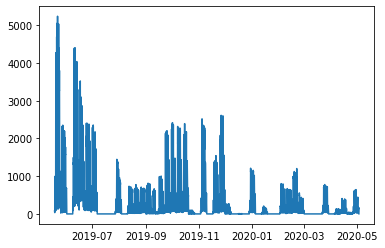

In [15]:
fig = plt.figure()
plt.plot(x, y)

#전체 시간별 연결 사용자 수

In [16]:
i = 0
for idx in day_y :
  if i > 5 : break
  print(idx, day_y[idx])
  i += 1

2019-05-19 00:00:00 75
2019-05-19 01:00:00 69
2019-05-19 02:00:00 53
2019-05-19 03:00:00 47
2019-05-19 04:00:00 35
2019-05-19 05:00:00 39


In [17]:
day_time = [{},{},{},{},{},{},{}]
for a in day_y :
  _date = a.dayofweek
  _hour = a.hour
  _cnt = day_y[a]
  if _hour not in day_time[_date] :
    day_time[_date][_hour] = _cnt
  else : 
    day_time[_date][_hour] += _cnt


for a in day_time :
  print(a)



{0: 4405, 1: 2897, 2: 2307, 3: 1913, 4: 1616, 5: 1717, 6: 2588, 7: 4261, 8: 15985, 9: 29647, 10: 39910, 11: 42338, 12: 37168, 13: 40593, 14: 41989, 15: 37506, 16: 41546, 17: 34959, 18: 25658, 19: 19022, 20: 17392, 21: 15042, 22: 11848, 23: 7979}
{0: 5434, 1: 3656, 2: 2729, 3: 2219, 4: 1932, 5: 2071, 6: 2944, 7: 4797, 8: 16339, 9: 31036, 10: 41524, 11: 43496, 12: 38579, 13: 41284, 14: 42578, 15: 40010, 16: 42047, 17: 35238, 18: 26109, 19: 19060, 20: 17255, 21: 14674, 22: 11284, 23: 7863}
{0: 5267, 1: 3697, 2: 2774, 3: 2362, 4: 2070, 5: 2086, 6: 2761, 7: 4513, 8: 15139, 9: 27818, 10: 35943, 11: 38765, 12: 34090, 13: 36548, 14: 39528, 15: 36275, 16: 36881, 17: 32986, 18: 24081, 19: 17639, 20: 15954, 21: 13780, 22: 10694, 23: 7429}
{0: 5425, 1: 3662, 2: 2764, 3: 2249, 4: 1969, 5: 2042, 6: 2621, 7: 4296, 8: 15121, 9: 28276, 10: 35168, 11: 38230, 12: 33990, 13: 36237, 14: 37049, 15: 35973, 16: 37246, 17: 31690, 18: 23252, 19: 17371, 20: 16036, 21: 13531, 22: 10473, 23: 7301}
{0: 5131, 1: 344

# 각 요일별, 시간별, 연결되어 있는 수

In [0]:
def getinfo(date, dic):
  return [dic[date][i] for i in range(0,24)]

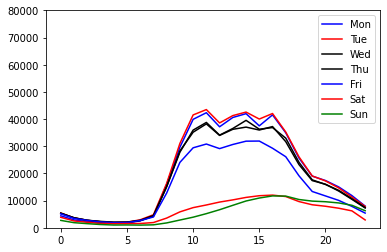

In [20]:
x = [i for i in range(0,24)]

plt.plot(x, getinfo(0,day_time), color = 'blue', label = 'Mon')
plt.plot(x, getinfo(1,day_time), color = 'red', label = 'Tue')
plt.plot(x, getinfo(2,day_time), color = 'black', label = 'Wed')
plt.plot(x, getinfo(3, day_time), color = 'black', label = 'Thu')
plt.plot(x, getinfo(4, day_time), color = 'blue', label = 'Fri')
plt.plot(x, getinfo(5, day_time), color = 'red', label = 'Sat')
plt.plot(x, getinfo(6, day_time), color = 'green', label = 'Sun')
plt.ylim(0, 80000)
plt.legend()

# 각 요일별, 시간별 연결 사용자 수

In [0]:
building = {}
for a in set(data['AP.3']) : 
  if a == 'Map Location' :
    continue
  elif a == 'Root Area' :
    building['Root Area'] = 0

  b = a.split('>')
  if len(b) > 2:
    building[b[1]] = 0

set(building)

{' 2BeobHak (608) ',
 ' 2SaBeom (701) ',
 ' 3Gong (105) ',
 ' BoYuk(New) (317) ',
 ' BonGwan ',
 ' Dent ',
 ' GiGoo (414) ',
 ' GongSil ',
 ' HakSang (708) ',
 ' HamDeuk ',
 ' HangGong (107) ',
 ' HwaGong (406) ',
 ' HwaHak (606) ',
 ' HyoWonMunHwa (106) ',
 ' HyoWonSanHak (506) ',
 ' JeDo (201) ',
 ' JeungRyu ',
 ' JinRyMNG (714) ',
 ' JoHyung (704) ',
 ' KiJun (108) ',
 ' Kmed ',
 ' Lib-2 (420) ',
 ' Med-Lib ',
 ' Medicine ',
 ' MulRy2 (309) ',
 ' NaNo ',
 ' Nursing ',
 ' OreFarm ',
 ' PowerPlant ',
 ' Pyeon ',
 ' SaengMyung ',
 ' Sanhak ',
 ' SeomYu (408) ',
 ' Silhum (111) ',
 ' ToeJo (302) ',
 ' TohabGiGe (303) ',
 'Root Area'}

#각 건물별 시간별 이용자 수 구하기

#각 건물별 패킷 총 사용량

In [31]:
data.iloc[35762]['AP.3']

'PUSAN-OUTDOOR > PUSAN-OUTDOOR'

In [26]:
_building = 'Pusan > Lib-2 (420) > Lib-2-3F'

building_index = [1]
i = 1
for a in data['AP.3'][1:]:
  if a != _building :
    _building = a
    building_index.append(i)
  i += 1
building_index

[1,
 18019,
 35763,
 48180,
 56094,
 57855,
 64194,
 67068,
 70035,
 72417,
 81865,
 87396,
 94024,
 105271,
 130947,
 148758,
 164553,
 178459,
 191812,
 224144,
 263644,
 285635,
 317366,
 341941,
 343529,
 346318,
 351370,
 352379,
 352752,
 353235,
 362414,
 379098,
 384612,
 410570,
 436956,
 471394,
 501377,
 537628,
 543286,
 547942,
 562208,
 574853,
 591647,
 642129,
 666722,
 677693,
 766536,
 794927,
 813557,
 829903,
 837091,
 852599,
 863761,
 872658,
 875343,
 893643,
 923491,
 942700,
 974000,
 1015528,
 1040860,
 1057897,
 1066875,
 1072130,
 1083823,
 1097249,
 1099257,
 1115945,
 1120047,
 1133020,
 1150142,
 1166819,
 1185098,
 1198071,
 1206058,
 1230248,
 1251769,
 1260320,
 1272742,
 1279580,
 1293405,
 1298345,
 1305420,
 1311162,
 1319335,
 1324608,
 1378855,
 1412485,
 1440518,
 1480572,
 1519242,
 1534859,
 1549287,
 1566211,
 1569700,
 1596169,
 1624515,
 1652731,
 1674665,
 1698441,
 1722848,
 1735987,
 1739331,
 1767024,
 1774827,
 1779054,
 1779901,
 17971

In [38]:
start = 1
packet_size = {}
for a in building_index[1:] :
  _cnt = 0
  for idx in range(start, a):
    _cnt += int(data.iloc[idx]['Utilization.3']) + int(data.iloc[idx]['Utilization.4'])
  if data.iloc[a - 1]['AP.3'] in packet_size :
    packet_size[data.iloc[a - 1]['AP.3']] += _cnt
  else :
    packet_size[data.iloc[a - 1]['AP.3']] = _cnt
  start = a
  print(data.iloc[a - 1]['AP.3'])
packet_size

Pusan > Lib-2 (420) > Lib-2-3F
PUSAN-OUTDOOR > PUSAN-OUTDOOR
Pusan > MulRy2 (309) > MulRy2 1F
Pusan > MulRy2 (309) > MulRy2 2F
Pusan > MulRy2 (309) > MulRy2 3F
Pusan > MulRy2 (309) > MulRy2 4F
Pusan > MulRy2 (309) > MulRy2 5F
Pusan > 2BeobHak (608) > 2BeobHak 1F
Pusan > 2BeobHak (608) > 2BeobHak 2F
Pusan > 2BeobHak (608) > 2BeobHak 3F
Pusan > 2BeobHak (608) > 2BeobHak 4F
Pusan > 2BeobHak (608) > 2BeobHak 5F
PUSAN-OUTDOOR > PUSAN-OUTDOOR
Pusan > 2SaBeom (701) > 2SaBeom1F
Pusan > 2SaBeom (701) > 2SaBeom2F
Pusan > 2SaBeom (701) > 2SaBeom3F
PUSAN-OUTDOOR > PUSAN-OUTDOOR
Pusan > 3Gong (105) > 3Gong1F
Pusan > 3Gong (105) > 3Gong2F
Pusan > 3Gong (105) > 3Gong3F
Pusan > 3Gong (105) > 3Gong4F
Pusan > 3Gong (105) > 3Gong5F
PUSAN-OUTDOOR > PUSAN-OUTDOOR
Pusan > SeomYu (408) > SeomYu 1F
Pusan > SeomYu (408) > SeomYu 2F
Root Area
Pusan > SeomYu (408) > SeomYu 2F
Root Area
Pusan > SeomYu (408) > SeomYu 2F
Pusan > SeomYu (408) > SeomYu 3F
PUSAN-OUTDOOR > PUSAN-OUTDOOR
Pusan > JeDo (201) > JeDo 1F
Pus

{'MilYang > BonGwan > BonGwan 1F': 3056986821,
 'MilYang > BonGwan > BonGwan 2F': 1289565144,
 'MilYang > BonGwan > BonGwan 3F': 473600855,
 'MilYang > BonGwan > BonGwan 4F': 640855659,
 'MilYang > BonGwan > BonGwan 5F': 71037634,
 'MilYang > BonGwan > BonGwan B1F': 32878952,
 'MilYang > GongSil > MNU-GongSil 1F': 23930911,
 'MilYang > GongSil > MNU-GongSil 2F': 1619753,
 'MilYang > GongSil > MNU-GongSil 3F': 24988591,
 'MilYang > GongSil > MNU-GongSil 4F': 9525464,
 'MilYang > GongSil > MNU-GongSil B1F': 3407020,
 'MilYang > HakSang (708) > Haksang1F': 58649766,
 'MilYang > HakSang (708) > Haksang2F': 529801163,
 'MilYang > HakSang (708) > Haksang3F': 119694727,
 'MilYang > HakSang (708) > Haksang4F': 27561762,
 'MilYang > NaNo > NaNo 1F': 22673332,
 'MilYang > NaNo > NaNo 2F': 53054478,
 'MilYang > NaNo > NaNo 4F': 21804404,
 'MilYang > NaNo > NaNo 5F': 360074170,
 'MilYang > NaNo > NaNo 6F': 258236450,
 'MilYang > NaNo > NoNo 3F': 24364695,
 'MilYang > OreFarm > OreFarm': 47937174,


In [39]:
for a in packet_size :
  print(a, packet_size[a])

Pusan > Lib-2 (420) > Lib-2-3F 2156325237
PUSAN-OUTDOOR > PUSAN-OUTDOOR 2182988506
Pusan > MulRy2 (309) > MulRy2 1F 184072747
Pusan > MulRy2 (309) > MulRy2 2F 97611376
Pusan > MulRy2 (309) > MulRy2 3F 92563814
Pusan > MulRy2 (309) > MulRy2 4F 77493204
Pusan > MulRy2 (309) > MulRy2 5F 83942283
Pusan > 2BeobHak (608) > 2BeobHak 1F 30252865
Pusan > 2BeobHak (608) > 2BeobHak 2F 67799880
Pusan > 2BeobHak (608) > 2BeobHak 3F 406705200
Pusan > 2BeobHak (608) > 2BeobHak 4F 283066134
Pusan > 2BeobHak (608) > 2BeobHak 5F 73520157
Pusan > 2SaBeom (701) > 2SaBeom1F 778473310
Pusan > 2SaBeom (701) > 2SaBeom2F 597574071
Pusan > 2SaBeom (701) > 2SaBeom3F 504882299
Pusan > 3Gong (105) > 3Gong1F 86336227
Pusan > 3Gong (105) > 3Gong2F 1237744156
Pusan > 3Gong (105) > 3Gong3F 1498533312
Pusan > 3Gong (105) > 3Gong4F 581174313
Pusan > 3Gong (105) > 3Gong5F 739069912
Pusan > SeomYu (408) > SeomYu 1F 52047546
Pusan > SeomYu (408) > SeomYu 2F 97408066
Root Area 275457608
Pusan > SeomYu (408) > SeomYu 3F 2742

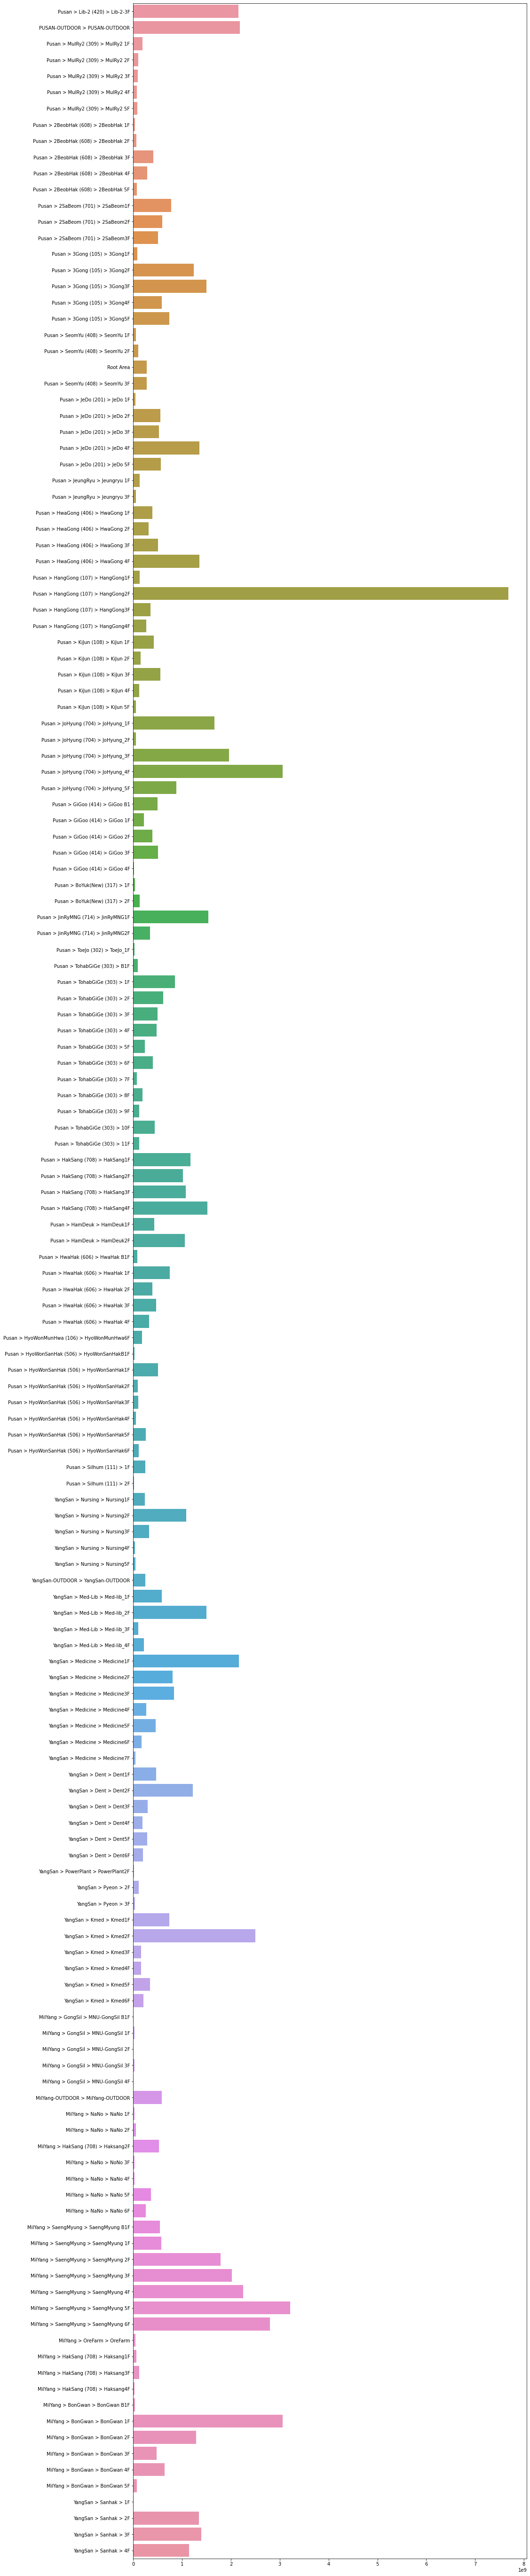

In [42]:
import seaborn as sns

figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15,100)
packet_size
x = []
y = []
for a in packet_size :
  x.append(a)
  y.append(packet_size[a])
sns.barplot(y , x, ax=ax1)